<a href="https://colab.research.google.com/github/namhoangubs/Orbit_Project/blob/main/time%20series%20simulation_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install orbit-ml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 8.8 MB/s eta 0:00:00
  Created wheel for orbit-ml: filename=orbit_ml-1.1.4.2-py3-none-any.whl size=475068 sha256=1e8cbd82d6b509ba0cfee29602a901df4fb4bea1efa98dfc63ac73c18ff1c400
  Stored in directory: /root/.cache/pip/wheels/d6/d5/12/29fb5179003c5899b3a9281d268f9579df35bb263b985c6456
Successfully built orbit-ml


**Generating simulated data**

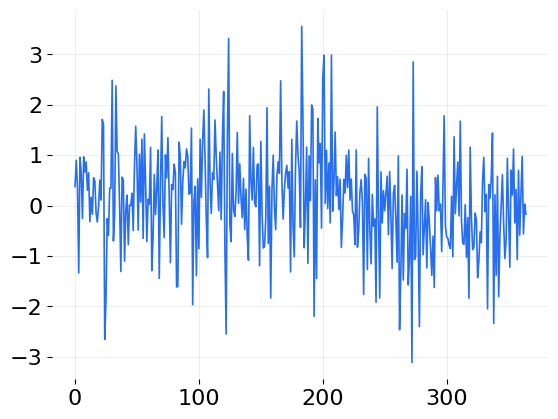

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import orbit
from orbit.utils.simulation import make_trend, make_seasonality, make_regression
from orbit.utils.plot import get_orbit_style
plt.style.use(get_orbit_style())
from orbit.constants.palette import OrbitPalette

NUM_OF_REGRESSORS = 2
SERIES_LEN = 365
SEED = 20
# sample some coefficients
COEFS = np.random.default_rng(SEED).uniform(-1, 1, NUM_OF_REGRESSORS)
trend = make_trend(SERIES_LEN, rw_loc=0.01, rw_scale=0.1)
seasonality = make_seasonality(SERIES_LEN, seasonality=7, method='discrete', seed=2020)
x, regression, coefs = make_regression(series_len=SERIES_LEN, coefs=COEFS)

# combine trend and the regression
y = regression + trend + seasonality

_ = plt.plot(y, color = OrbitPalette.BLUE.value)

**Create train/test sets**

In [ ]:
x_cols = [f"x{x}" for x in range(1, NUM_OF_REGRESSORS + 1)]
response_col = "y"
dt_col = "date"
obs_matrix = np.concatenate([y.reshape(-1, 1), x], axis=1)
# make a data frame for orbit inputs
df = pd.DataFrame(obs_matrix, columns=[response_col] + x_cols)
# make some dummy date stamp
dt = pd.date_range(start='2020-01-01', periods=SERIES_LEN, freq="1W")
df['date'] = dt

# Define test size
test_size = 50

# Split data into training and testing sets
train_df = df[:-test_size]
test_df = df[-test_size:]

In [ ]:
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components
from orbit.utils.dataset import load_iclaims

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**DTL - Linear Global Trend**

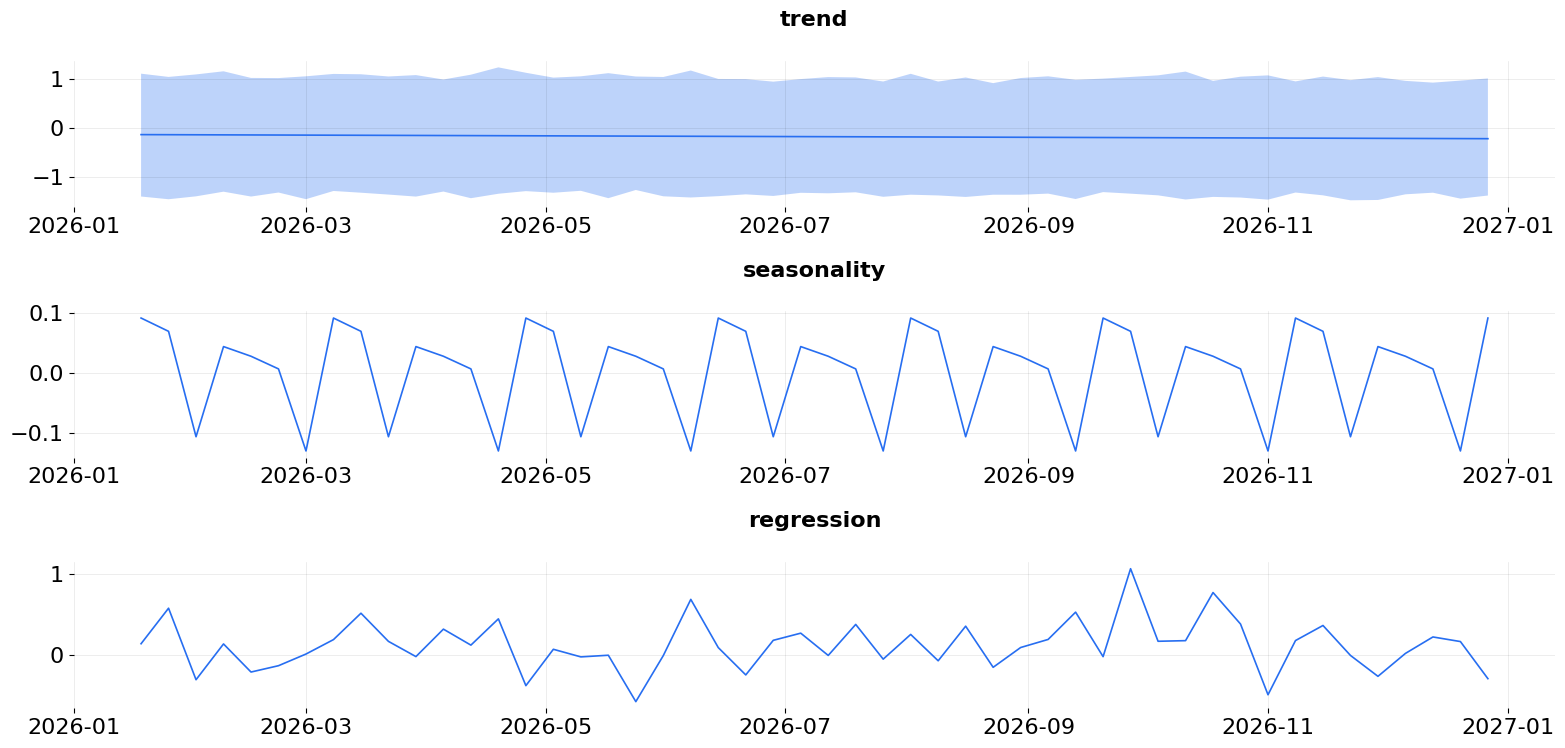

In [ ]:
dlt_linear = DLT(
    response_col=response_col,
    date_col=dt_col,
    estimator='stan-map',
    seed=2023,
    seasonality=7,
    regressor_col=x_cols,
    #regressor_beta_prior=[0.1, 0.2],
    #regressor_sigma_prior=[0.1, 1.0],
    #stan_mcmc_args={'show_progress': False},
    global_trend_option='linear',
    verbose=False,
    n_bootstrap_draws=1000
)

dlt_linear.fit(train_df)
predicted_dtl_linear = dlt_linear.predict(test_df, decompose = True)
plot_predicted_components(predicted_dtl_linear, dt_col);

In [ ]:
# Evaluate model
actual_values = df[response_col][-test_size:].values

regress_predicted_values = predicted_dtl_linear['prediction'].values

mae = mean_absolute_error(actual_values, regress_predicted_values)
mse = mean_squared_error(actual_values, regress_predicted_values)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.7607836432853881
Mean Squared Error (MSE): 0.8941540742361062
Root Mean Squared Error (RMSE): 0.9455972050699527


**DTL - Log-linear Global Trend**

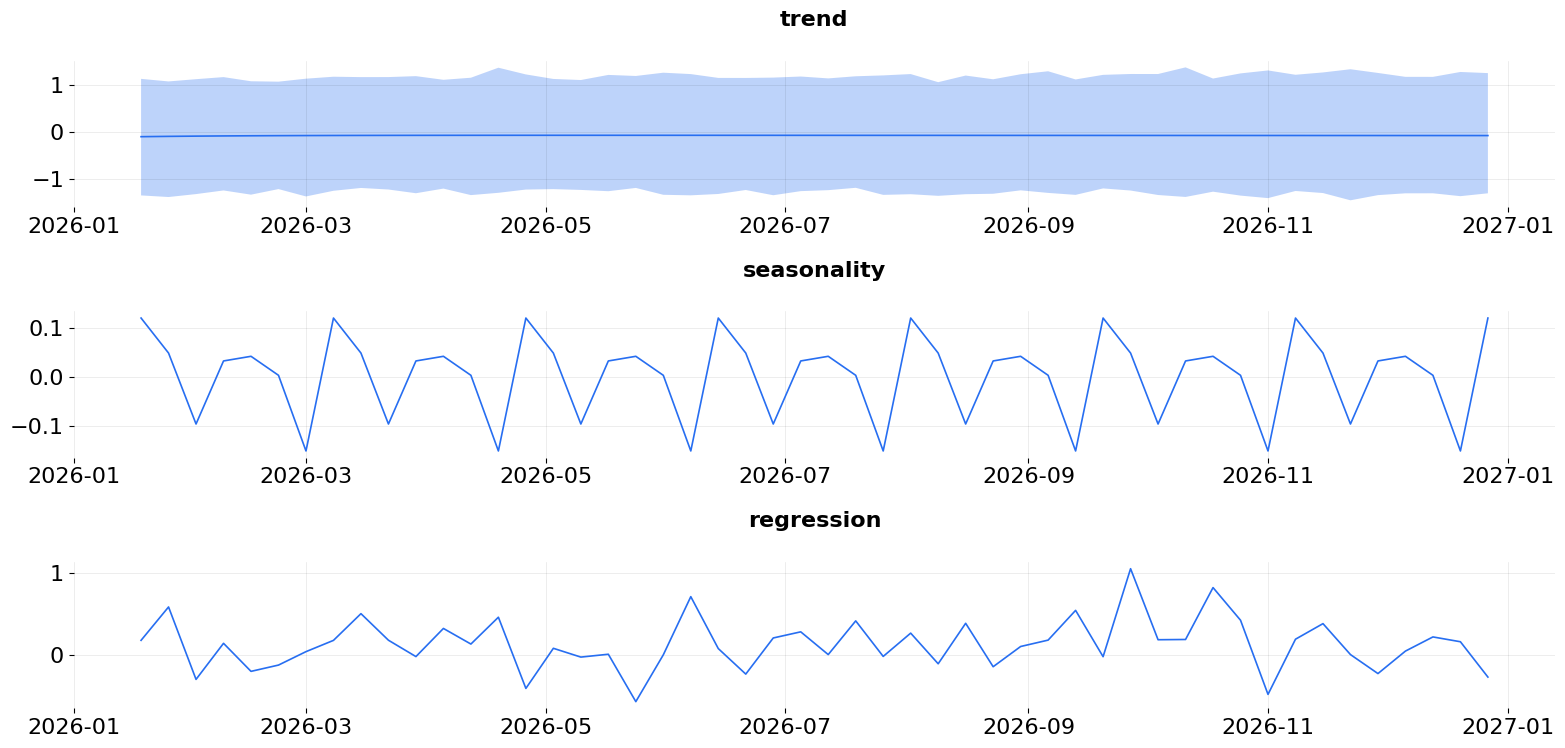

In [ ]:
dlt_loglinear = DLT(
    response_col=response_col,
    date_col=dt_col,
    estimator='stan-map',
    seed=2023,
    seasonality=7,
    regressor_col=x_cols,
    #regressor_beta_prior=[0.1, 0.2],
    #regressor_sigma_prior=[0.1, 1.0],
    #stan_mcmc_args={'show_progress': False},
    global_trend_option='loglinear',
    verbose=False,
    n_bootstrap_draws=1000
)

dlt_loglinear.fit(train_df)
predicted_dlt_loglinear = dlt_loglinear.predict(test_df, decompose = True)
plot_predicted_components(predicted_dlt_loglinear, dt_col);

In [ ]:
actual_values = df[response_col][-test_size:].values

regress_predicted_values = predicted_dlt_loglinear['prediction'].values

mae = mean_absolute_error(actual_values, regress_predicted_values)
mse = mean_squared_error(actual_values, regress_predicted_values)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.7635355009017297
Mean Squared Error (MSE): 0.9360998935570864
Root Mean Squared Error (RMSE): 0.9675225545469658


**DLT - Logistic Global Trend**

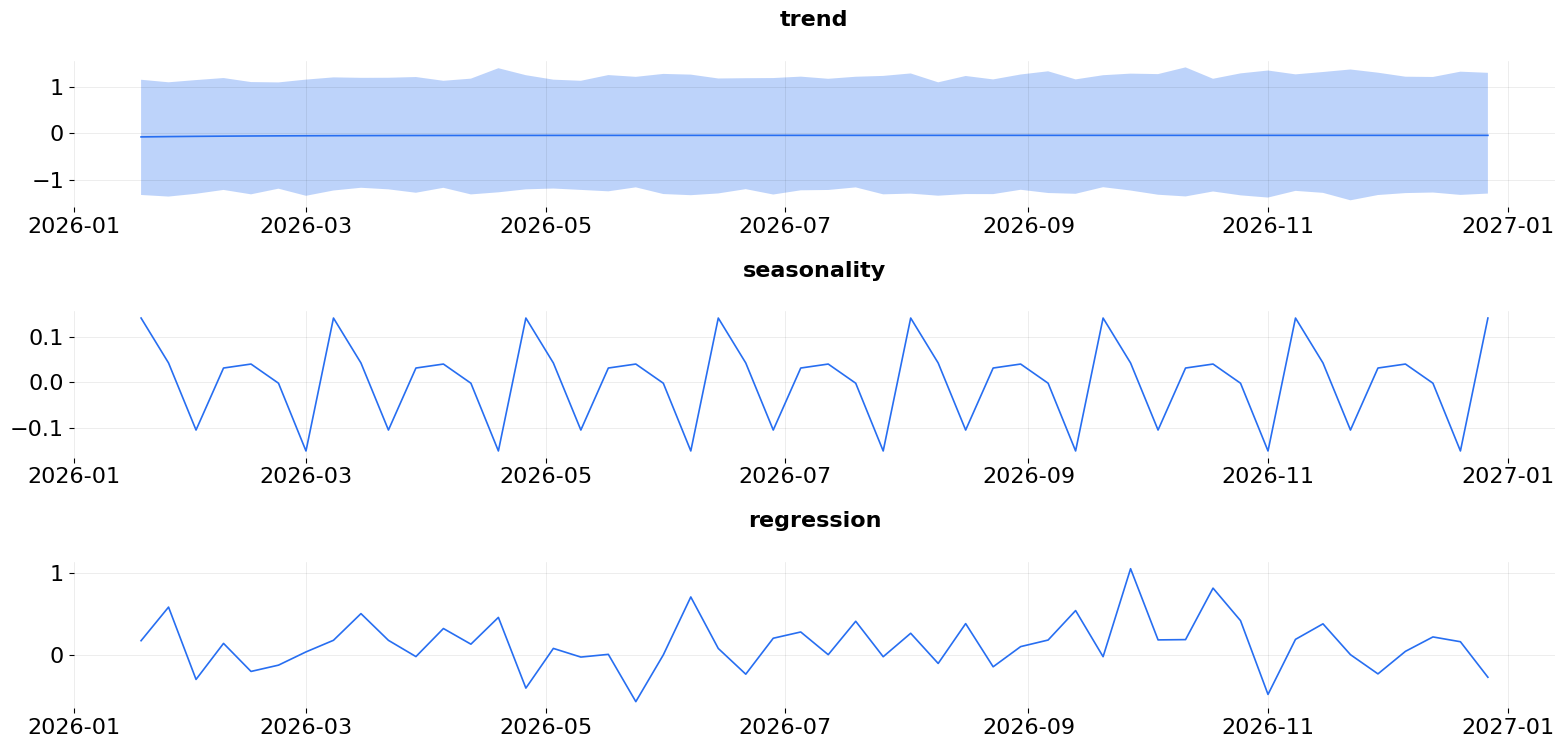

In [ ]:
dlt_logistic = DLT(
    response_col=response_col,
    date_col=dt_col,
    estimator='stan-map',
    seed=2023,
    seasonality=7,
    regressor_col=x_cols,
    #regressor_beta_prior=[0.1, 0.2],
    #regressor_sigma_prior=[0.1, 1.0],
    #stan_mcmc_args={'show_progress': False},
    global_trend_option='logistic',
    verbose=False,
    n_bootstrap_draws=1000
)

dlt_logistic.fit(train_df)
predicted_dlt_logistic = dlt_logistic.predict(test_df, decompose = True)
plot_predicted_components(predicted_dlt_logistic, dt_col);

In [ ]:
actual_values = df[response_col][-test_size:].values

regress_predicted_values = predicted_dlt_logistic['prediction'].values

mae = mean_absolute_error(actual_values, regress_predicted_values)
mse = mean_squared_error(actual_values, regress_predicted_values)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.7663812043898556
Mean Squared Error (MSE): 0.9490800862155624
Root Mean Squared Error (RMSE): 0.9742074143710683


**Backtesting DLT Linear model**

/usr/local/lib/python3.10/dist-packages/orbit/diagnostics/plot.py:428: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


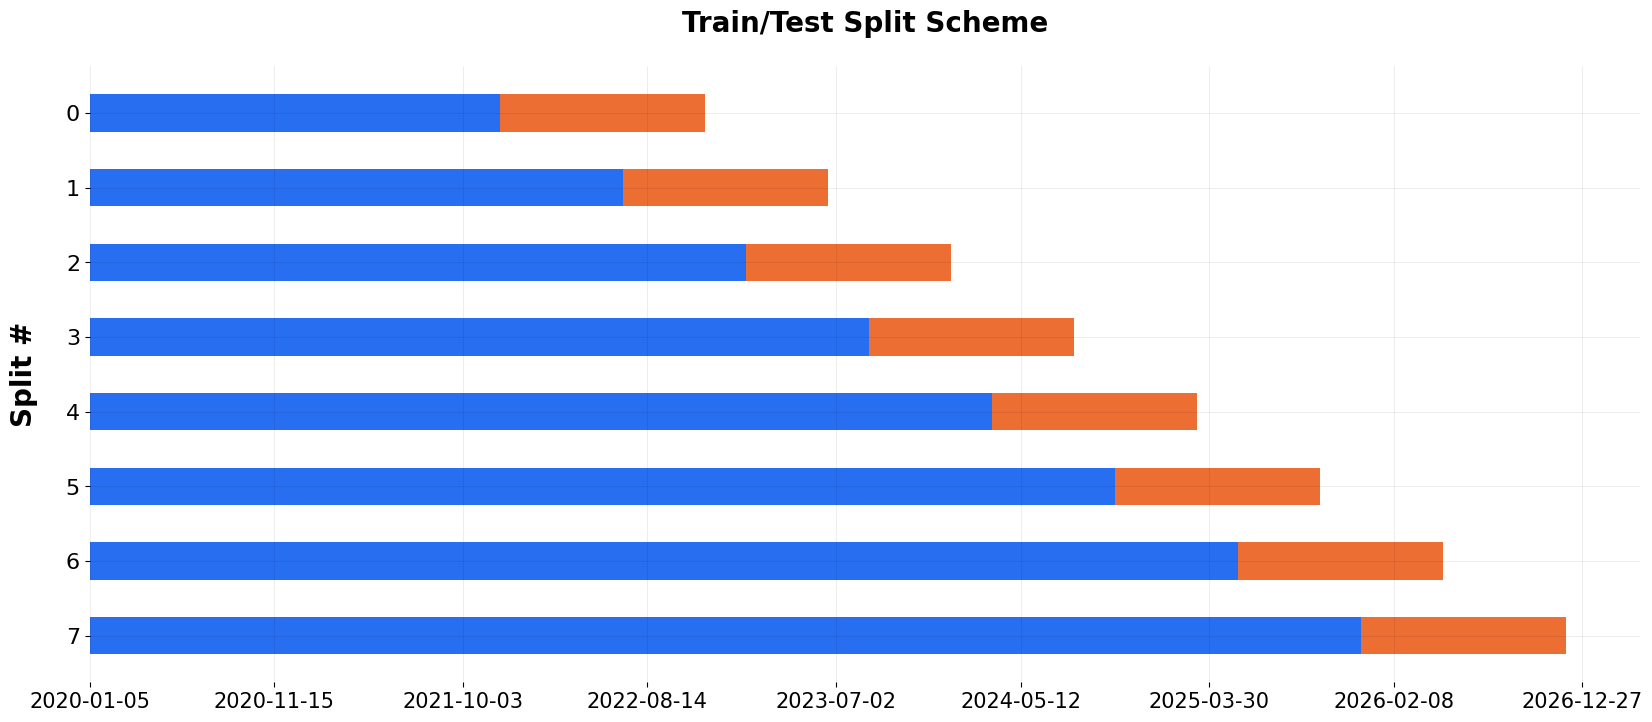

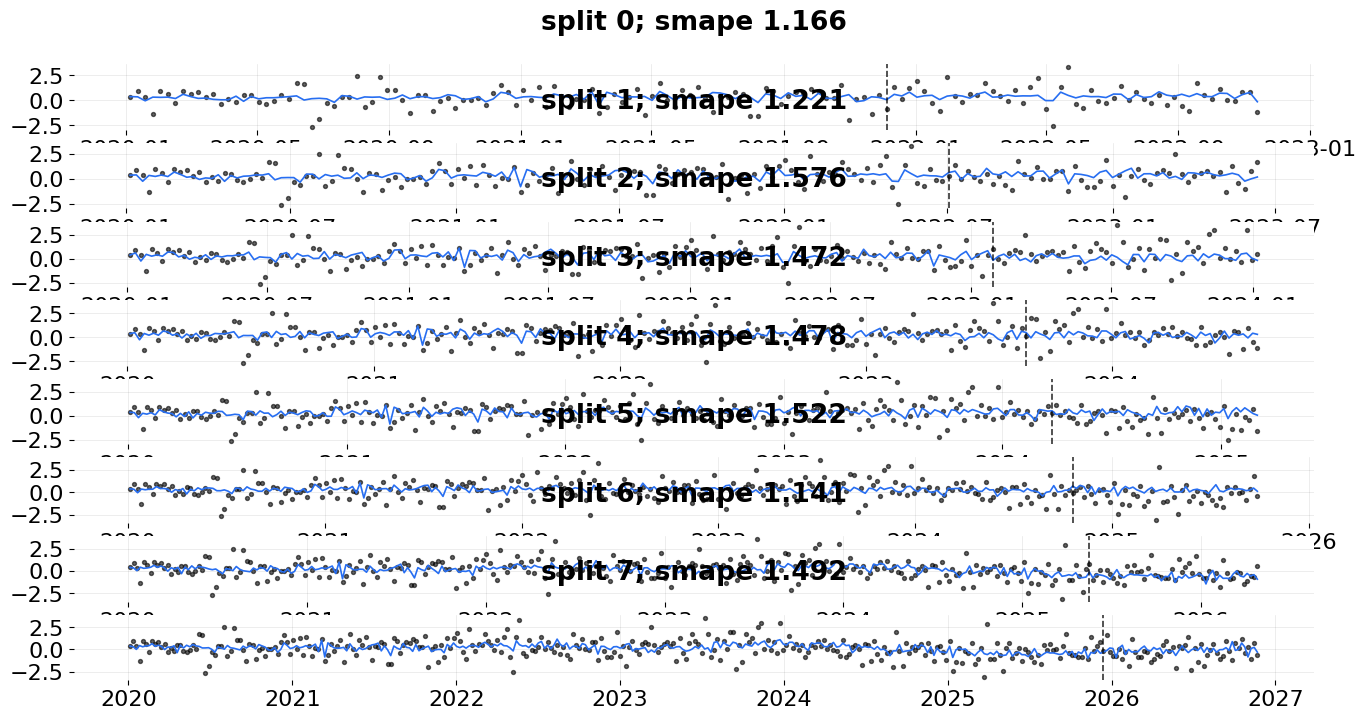

,metric_name,metric_values,is_training_metric
0,smape,1.383555,False
1,wmape,1.009201,False
2,mape,1.808503,False
3,mse,1.081653,False
4,mae,0.818706,False
5,rmsse,0.691529,False
6,smape,1.280286,True
7,wmape,0.892413,True
8,mape,7.655730,True
9,mse,0.919874,True


In [ ]:
from orbit.diagnostics.backtest import BackTester, TimeSeriesSplitter
from orbit.diagnostics.plot import plot_bt_predictions
from orbit.diagnostics.metrics import smape, wmape
from orbit.utils.dataset import load_iclaims

# configs
min_train_len = 100
forecast_len = 50
incremental_len = 30
window_type = 'expanding'

ex_splitter = TimeSeriesSplitter(df=df,
                                 min_train_len=min_train_len,
                                 incremental_len=incremental_len,
                                 forecast_len=forecast_len,
                                 window_type=window_type,
                                 date_col=dt_col)

_ = ex_splitter.plot()

# instantiate a DLT Linear model
dlt_linear = DLT(
    response_col=response_col,
    date_col=dt_col,
    estimator='stan-map',
    seed=2023,
    seasonality=7,
    regressor_col=x_cols,
    #regressor_beta_prior=[0.1, 0.2],
    #regressor_sigma_prior=[0.1, 1.0],
    #stan_mcmc_args={'show_progress': False},
    global_trend_option='linear',
    verbose=False,
    n_bootstrap_draws=1000
)

# instantiate a backtester
bt = BackTester(
    model=dlt_linear,
    df=df,
    min_train_len=min_train_len,
    incremental_len=incremental_len,
    forecast_len=forecast_len,
    window_type=window_type,
)

bt.fit_predict()

predicted_df = bt.get_predicted_df()
predicted_df.head()

plot_bt_predictions(predicted_df, metrics=smape, ncol=1, include_vline=True)

bt.score(include_training_metrics=True)

**Backtesting DLT - Log-linear model**

/usr/local/lib/python3.10/dist-packages/orbit/diagnostics/plot.py:428: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


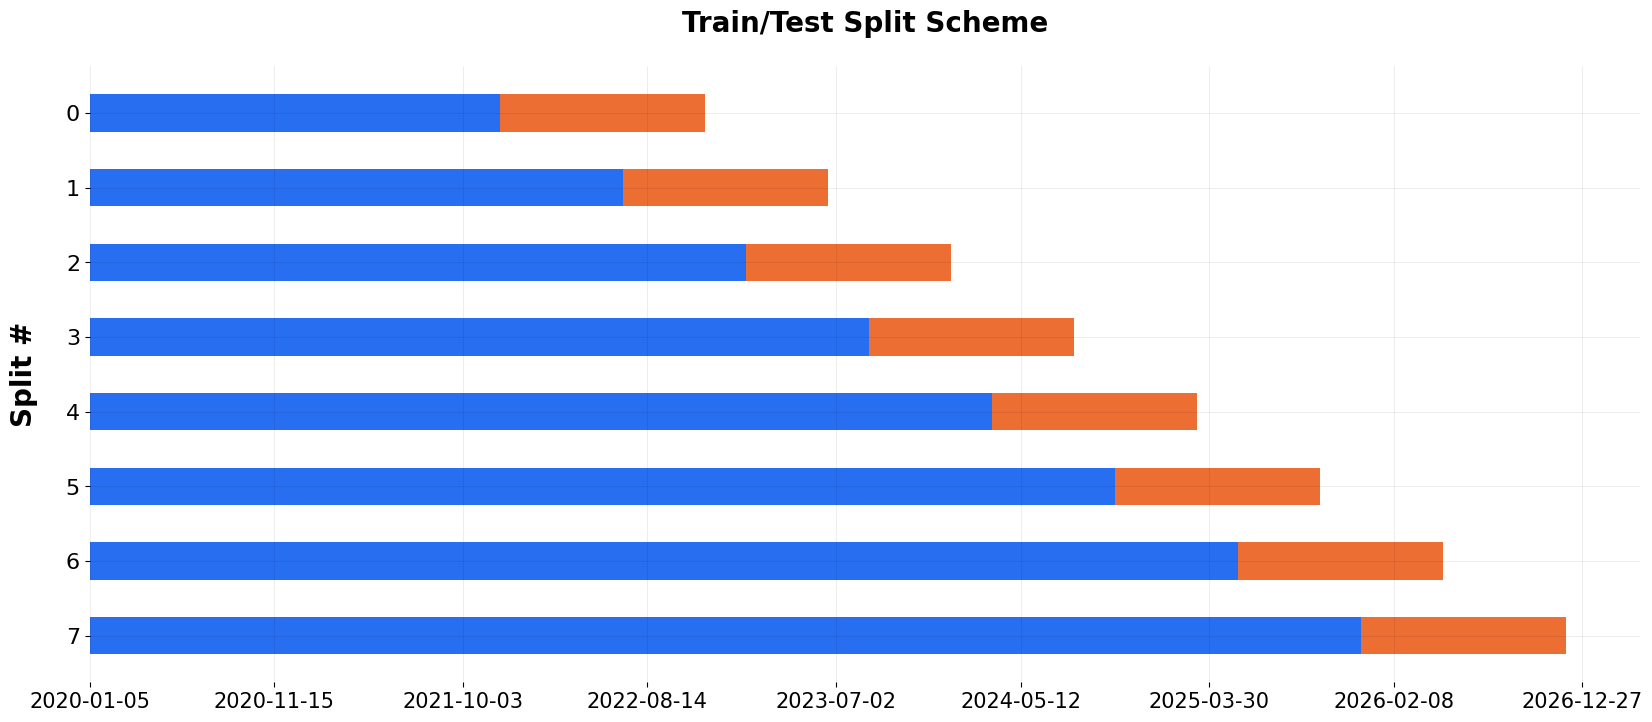

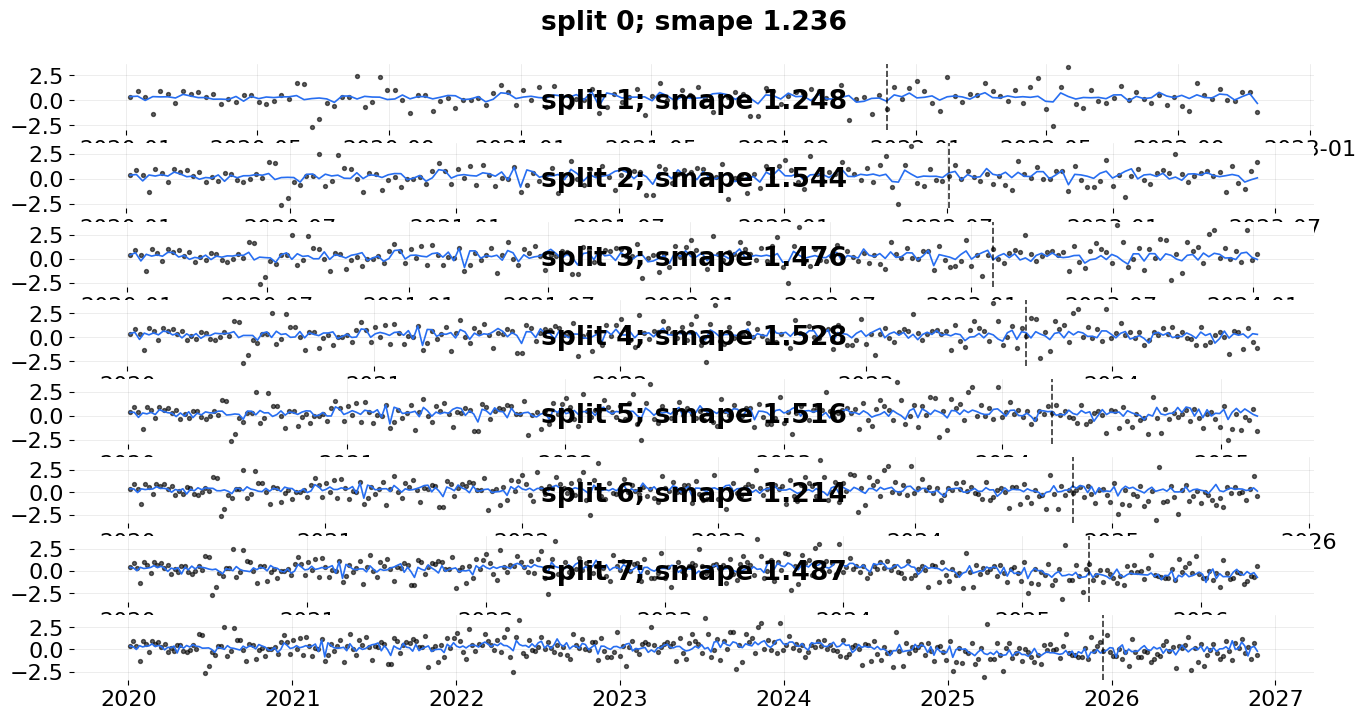

,metric_name,metric_values,is_training_metric
0,smape,1.406138,False
1,wmape,0.999238,False
2,mape,1.700877,False
3,mse,1.059018,False
4,mae,0.810623,False
5,rmsse,0.684256,False
6,smape,1.275975,True
7,wmape,0.892252,True
8,mape,7.041527,True
9,mse,0.919857,True


In [ ]:
# configs
min_train_len = 100
forecast_len = 50
incremental_len = 30
window_type = 'expanding'

ex_splitter = TimeSeriesSplitter(df=df,
                                 min_train_len=min_train_len,
                                 incremental_len=incremental_len,
                                 forecast_len=forecast_len,
                                 window_type=window_type,
                                 date_col=dt_col)

_ = ex_splitter.plot()

# instantiate a DLT LogLinear model
dlt_loglinear = DLT(
    response_col=response_col,
    date_col=dt_col,
    estimator='stan-map',
    seed=2023,
    seasonality=7,
    regressor_col=x_cols,
    #regressor_beta_prior=[0.1, 0.2],
    #regressor_sigma_prior=[0.1, 1.0],
    #stan_mcmc_args={'show_progress': False},
    global_trend_option='loglinear',
    verbose=False,
    n_bootstrap_draws=1000
)

# instantiate a backtester
bt = BackTester(
    model=dlt_loglinear,
    df=df,
    min_train_len=min_train_len,
    incremental_len=incremental_len,
    forecast_len=forecast_len,
    window_type=window_type,
)

bt.fit_predict()

predicted_df = bt.get_predicted_df()
predicted_df.head()

plot_bt_predictions(predicted_df, metrics=smape, ncol=1, include_vline=True)

bt.score(include_training_metrics=True)

**Backtesting DLT - Logistic model**

/usr/local/lib/python3.10/dist-packages/orbit/diagnostics/plot.py:428: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


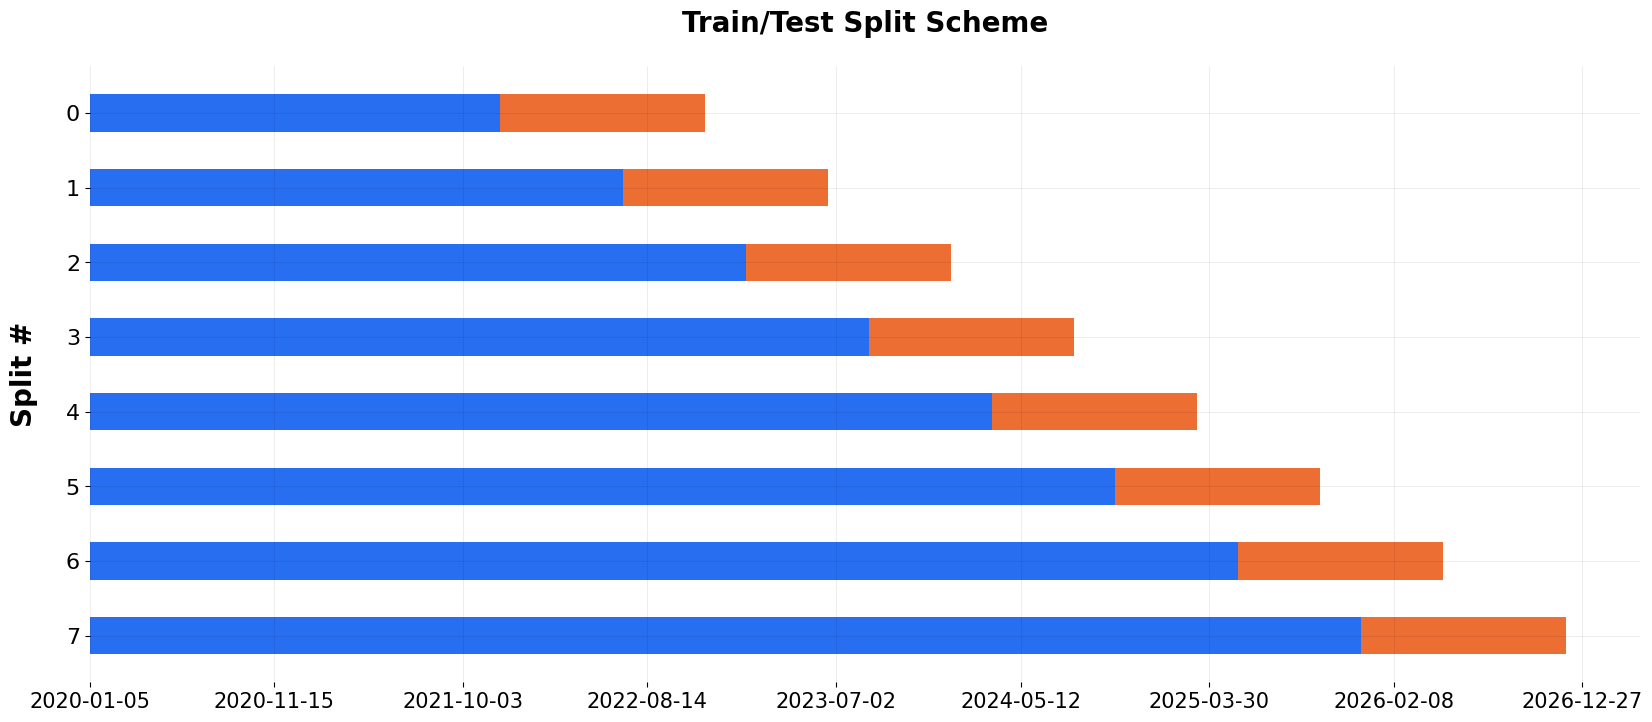

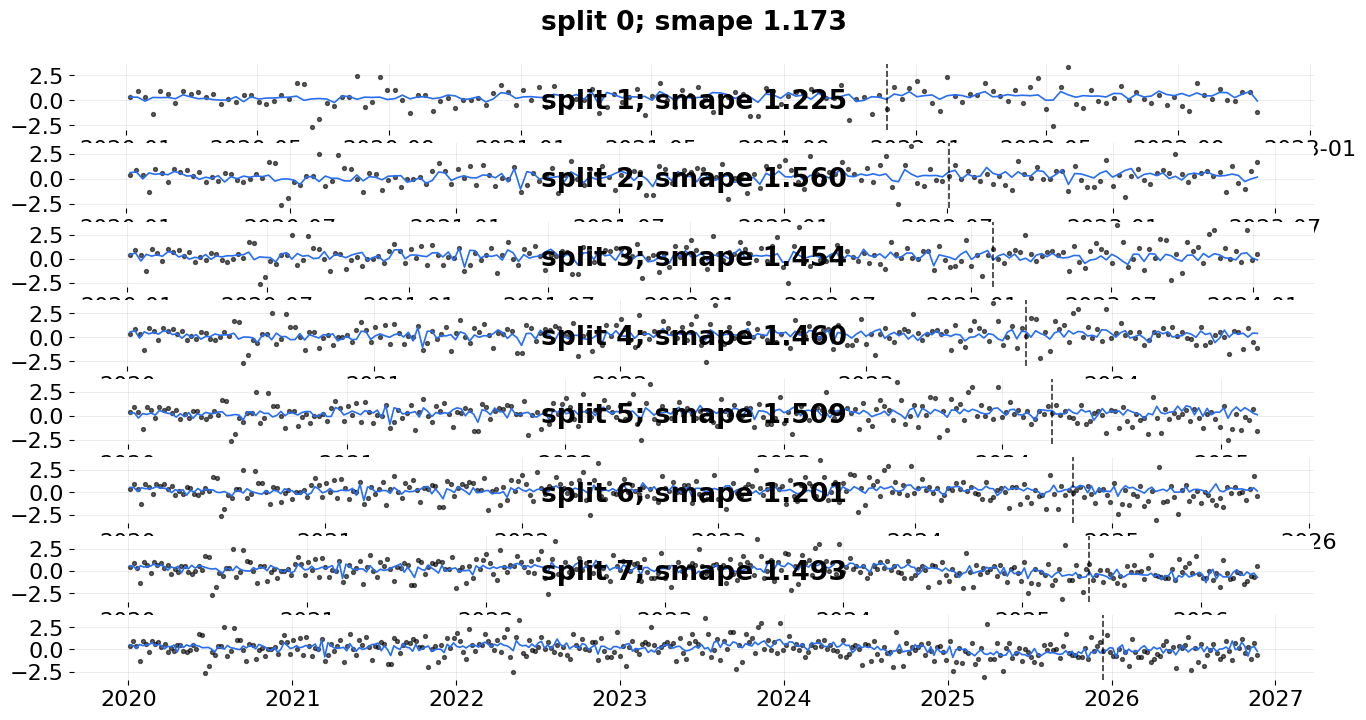

,metric_name,metric_values,is_training_metric
0,smape,1.384391,False
1,wmape,1.011010,False
2,mape,1.818078,False
3,mse,1.083432,False
4,mae,0.820173,False
5,rmsse,0.692098,False
6,smape,1.284369,True
7,wmape,0.894070,True
8,mape,8.691812,True
9,mse,0.924598,True


In [ ]:
# configs
min_train_len = 100
forecast_len = 50
incremental_len = 30
window_type = 'expanding'

ex_splitter = TimeSeriesSplitter(df=df,
                                 min_train_len=min_train_len,
                                 incremental_len=incremental_len,
                                 forecast_len=forecast_len,
                                 window_type=window_type,
                                 date_col=dt_col)

_ = ex_splitter.plot()

# instantiate a DLT LogLinear model
dlt_logistic = DLT(
    response_col=response_col,
    date_col=dt_col,
    estimator='stan-map',
    seed=2023,
    seasonality=7,
    regressor_col=x_cols,
    #regressor_beta_prior=[0.1, 0.2],
    #regressor_sigma_prior=[0.1, 1.0],
    #stan_mcmc_args={'show_progress': False},
    global_trend_option='logistic',
    verbose=False,
    n_bootstrap_draws=1000
)

# instantiate a backtester
bt = BackTester(
    model=dlt_logistic,
    df=df,
    min_train_len=min_train_len,
    incremental_len=incremental_len,
    forecast_len=forecast_len,
    window_type=window_type,
)

bt.fit_predict()

predicted_df = bt.get_predicted_df()
predicted_df.head()

plot_bt_predictions(predicted_df, metrics=smape, ncol=1, include_vline=True)

bt.score(include_training_metrics=True)

**Hyperparameter Tunning - DLT Linear**

In [ ]:
from orbit.utils.params_tuning import grid_search_orbit
# defining the search space for level smoothing paramter and seasonality smooth paramter
param_grid = {
    'level_sm_input': [0.1, 0.3, 0.5, 0.7, 0.9],
    'seasonality_sm_input': [0.1, 0.3, 0.5, 0.7, 0.9],
}

# configs
min_train_len = 100 # minimal length of window length
forecast_len = 50 # length forecast window
incremental_len = 30 # step length for moving forward
window_type = 'expanding'

best_params, tuned_df = grid_search_orbit(
    param_grid,
    model=dlt_linear,
    df=df,
    min_train_len=min_train_len,
    incremental_len=incremental_len,
    forecast_len=forecast_len,
    window_type = window_type,
    metrics=None,
    criteria="min",
    verbose=False,
)

best_params

  0%|          | 0/25 [00:00<?, ?it/s]

[{'level_sm_input': 0.1, 'seasonality_sm_input': 0.1}]

In [ ]:
dlt_linear = DLT(
    response_col=response_col,
    date_col=dt_col,
    estimator='stan-map',
    seed=2023,
    seasonality=7,
    regressor_col=x_cols,
    #regressor_beta_prior=[0.1, 0.2],
    #regressor_sigma_prior=[0.1, 1.0],
    #stan_mcmc_args={'show_progress': False},
    global_trend_option='linear',
    verbose=False,
    level_sm_input = 0.1,
    seasonality_sm_input = 0.1,
    n_bootstrap_draws=1000
)

dlt_linear.fit(df)
#test_df = dlt_linear.make_future_df(periods=50)
predicted_df = dlt_linear.predict(test_df, decompose = True)

actual_values = df[response_col][-50:].values

predicted_values = predicted_df['prediction'].values

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.810386615925309
Mean Squared Error (MSE): 0.9831708444352688
Root Mean Squared Error (RMSE): 0.9915497185896776


**Hyperparameter Tunning for DLT - Loglinear**

In [ ]:
# defining the search space for level smoothing paramter and seasonality smooth paramter
param_grid = {
    'level_sm_input': [0.1, 0.3, 0.5, 0.7, 0.9],
    'seasonality_sm_input': [0.1, 0.3, 0.5, 0.7, 0.9],
}

# configs
min_train_len = 100 # minimal length of window length
forecast_len = 50 # length forecast window
incremental_len = 30 # step length for moving forward
window_type = 'expanding'

best_params, tuned_df = grid_search_orbit(
    param_grid,
    model=dlt_loglinear,
    df=df,
    min_train_len=min_train_len,
    incremental_len=incremental_len,
    forecast_len=forecast_len,
    window_type = window_type,
    metrics=None,
    criteria="min",
    verbose=False,
)

best_params

  0%|          | 0/25 [00:00<?, ?it/s]

[{'level_sm_input': 0.1, 'seasonality_sm_input': 0.1}]

In [ ]:
dlt_loglinear = DLT(
    response_col=response_col,
    date_col=dt_col,
    estimator='stan-map',
    seed=2023,
    seasonality=7,
    regressor_col=x_cols,
    #regressor_beta_prior=[0.1, 0.2],
    #regressor_sigma_prior=[0.1, 1.0],
    #stan_mcmc_args={'show_progress': False},
    global_trend_option='loglinear',
    verbose=False,
    level_sm_input = 0.1,
    seasonality_sm_input = 0.1,
    n_bootstrap_draws=1000
)

dlt_loglinear.fit(df)
#test_df = dlt_linear.make_future_df(periods=50)
predicted_df = dlt_loglinear.predict(test_df, decompose = True)

actual_values = df[response_col][-50:].values

predicted_values = predicted_df['prediction'].values

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.8097853015653615
Mean Squared Error (MSE): 0.9823356108265078
Root Mean Squared Error (RMSE): 0.991128453242317


**Hyperparameter Tunning for DLT - Logistic**

In [ ]:
# defining the search space for level smoothing paramter and seasonality smooth paramter
param_grid = {
    'level_sm_input': [0.1, 0.3, 0.5, 0.7, 0.9],
    'seasonality_sm_input': [0.1, 0.3, 0.5, 0.7, 0.9],
}

# configs
min_train_len = 100 # minimal length of window length
forecast_len = 50 # length forecast window
incremental_len = 30 # step length for moving forward
window_type = 'expanding'

best_params, tuned_df = grid_search_orbit(
    param_grid,
    model=dlt_logistic,
    df=df,
    min_train_len=min_train_len,
    incremental_len=incremental_len,
    forecast_len=forecast_len,
    window_type = window_type,
    metrics=None,
    criteria="min",
    verbose=False,
)

best_params

  0%|          | 0/25 [00:00<?, ?it/s]

[{'level_sm_input': 0.1, 'seasonality_sm_input': 0.1}]

In [ ]:
dlt_logistic = DLT(
    response_col=response_col,
    date_col=dt_col,
    estimator='stan-map',
    seed=2023,
    seasonality=7,
    regressor_col=x_cols,
    #regressor_beta_prior=[0.1, 0.2],
    #regressor_sigma_prior=[0.1, 1.0],
    #stan_mcmc_args={'show_progress': False},
    global_trend_option='logistic',
    verbose=False,
    level_sm_input = 0.1,
    seasonality_sm_input = 0.1,
    n_bootstrap_draws=1000
)

dlt_logistic.fit(df)
#test_df = dlt_linear.make_future_df(periods=50)
predicted_df = dlt_logistic.predict(test_df, decompose = True)

actual_values = df[response_col][-50:].values

predicted_values = predicted_df['prediction'].values

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.810233300325388
Mean Squared Error (MSE): 0.9828419071131396
Root Mean Squared Error (RMSE): 0.9913838344017617


# **Conclusion**
Performance among the three Distributed Ledger Technology (DLT) model configs — Linear Global Trend, Log-Linear Global Trend, and Logistic Global Trend are resembling across various performance measurements.

When it comes to backtesting, out-of-sample performance exhibits similar results to that of in-sample, most likely as a result of in-sample and out-sample are generated from the same simulator. Unfortunately, results from tunned hyperparameters yield worse results compared to the default